In [59]:
import pandas as pd
import numpy as np

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

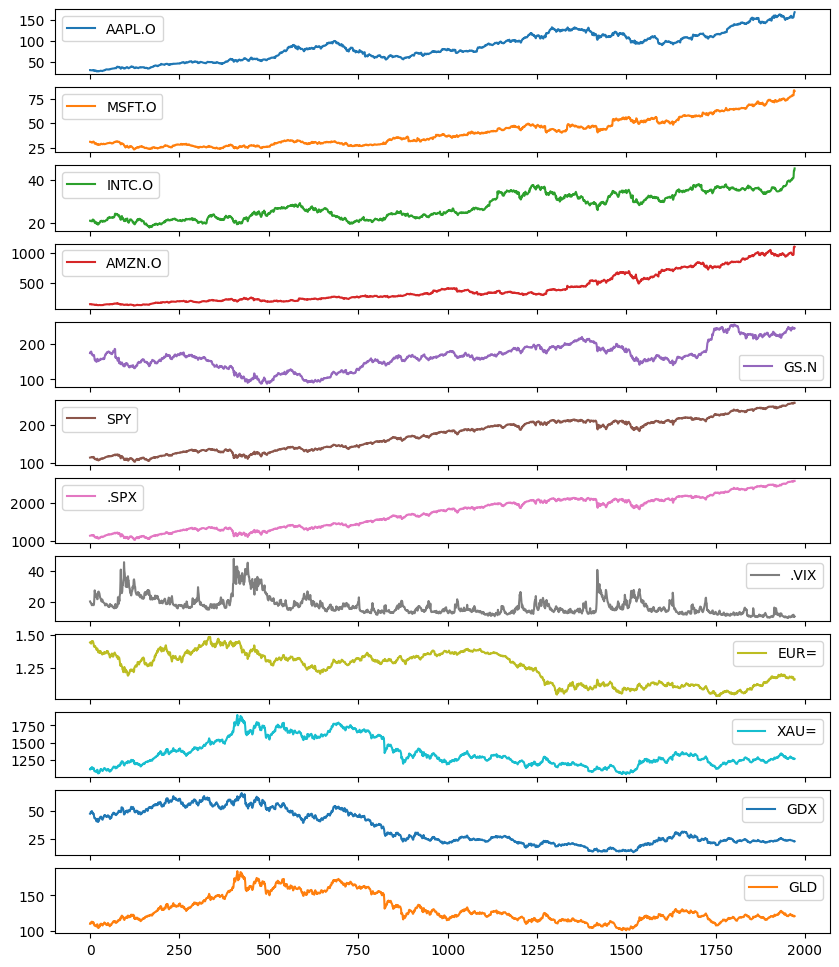

In [36]:
data = pd.read_csv("stocks.csv")
data.plot(subplots=True, figsize=(10,12))

<Axes: >

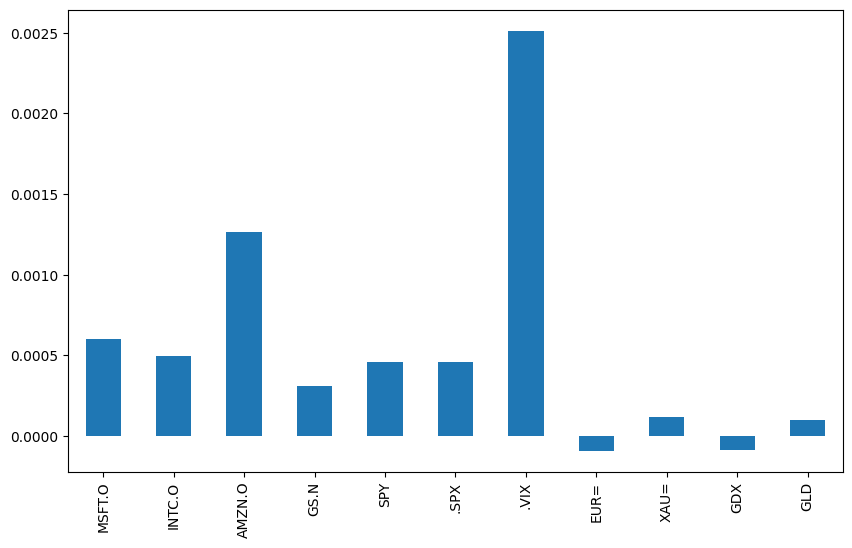

In [37]:
data = data.dropna()
data.iloc[:,2:].pct_change().mean().plot(kind='bar', figsize=(10, 6))

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [39]:
data['min'] = data[sym].rolling(window=window).min()
In [30]: data['mean'] = data[sym].rolling(window=window).mean()data.resample('1w', label='right').last().head()

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_11370/1788762236.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data.resample('1w', label='right').last().head()


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [47]:
data.resample('2W', label='right').first().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.572827,30.95,20.88,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-24,30.015684,30.27,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-02-07,29.010685,29.32,20.32,120.310,154.98,109.77,1096.78,25.41,1.4150,1097.85,43.19,107.48
2010-02-21,27.731401,27.72,19.35,116.830,151.10,105.89,1056.74,26.51,1.3652,1063.35,40.78,104.04
2010-03-07,28.630829,28.73,20.87,118.010,156.71,111.16,1108.01,19.94,1.3597,1113.30,44.09,109.07


In [45]:
data.resample('1m', label='right').last().head()

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_11370/2904013636.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('1m', label='right').last().head()


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


<Axes: xlabel='Date'>

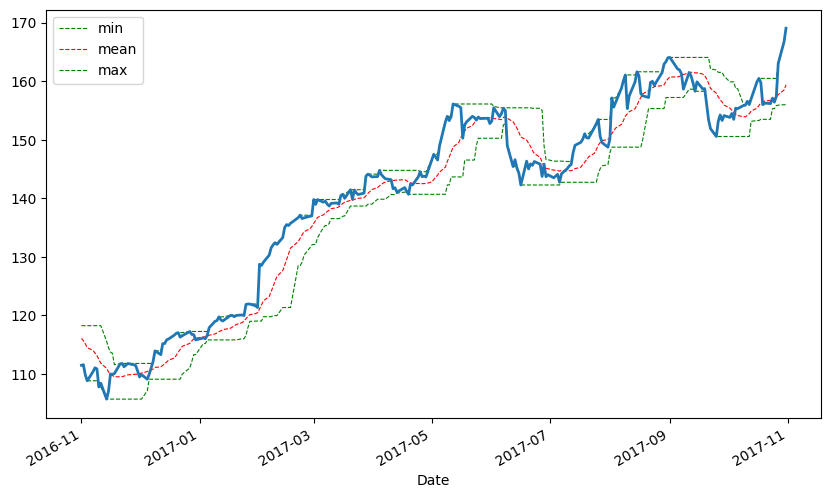

In [56]:
sym = "AAPL.O"
window = 14
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['max'] = data[sym].rolling(window=window).max()

ax = data[['min', 'mean', 'max']].iloc[-252:].plot(
              figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-252:].plot(ax=ax, lw=2.0)

## Simple indicator for entry based on moving average

In [60]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

In [64]:
data['pnl'] = 0  # Initialize PNL column with zeros
for i in range(len(data) - 1):  # Iterate through each row except the last one
    if data['positions'].iloc[i] == 1:  # Buy position
        price_buy = data[sym].iloc[i]
        price_sell = data[sym].iloc[i + 1]  # Price on the next day
        pnl = price_sell - price_buy
        data.at[data.index[i], 'pnl'] = pnl
    elif data['positions'].iloc[i] == -1:  # Sell position
        price_sell = data[sym].iloc[i]
        price_buy = data[sym].iloc[i + 1]  # Price on the next day
        pnl = price_sell - price_buy
        data.at[data.index[i], 'pnl'] = pnl

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_11370/2420769785.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.05285709000000338' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[data.index[i], 'pnl'] = pnl


In [66]:
sum(data["pnl"])

140.23861859

In [67]:
max(data["pnl"])

9.072133785000005

In [68]:
min(data["pnl"])

-6.890000000000001

In [70]:
days_loss = (data['pnl'] < 0).sum()
days_profit = (data['pnl'] > 0).sum()

print("Number of days of loss:", days_loss)
print("Number of days of profit:", days_profit)


Number of days of loss: 958
Number of days of profit: 1011


In [73]:
data[data['pnl'] > 0]["pnl"].sum()

1006.1962425434999

In [74]:
data[data['pnl'] < 0]["pnl"].sum()

-865.9576239534997

In [75]:
months_in_the_year = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [77]:
months_in_the_year[3]

'April'

In [78]:
a=0.1
b=0.2
c=0.3
print(a+b+c)

0.6000000000000001


In [130]:
import pandas as pd
import numpy as np

data = pd.read_csv("FTSE100.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
dataFiltered = data[data['Date'].dt.year == 2018]
dataFiltered.set_index('Date', inplace=True)
weeklyData = dataFiltered.resample('W').last()
weeklydata = weeklyData.dropna()
weeklydata = weeklyData[:len(weeklyData)-1:]
m = np.diff(np.log(weeklyData["Close"])).mean()
s = np.diff(np.log(weeklyData["Close"])).std()
print("mean:", m)
print("SD: ", s)

mean: -0.002655105430998177
SD:  0.016997281921308404


In [99]:
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

In [145]:
ticker.iloc[0]

INTC     40.940693
MSFT     95.846024
IBM      85.522629
BHP      32.875111
TM      116.279999
AAPL     37.845043
AMZN     76.956497
BA      314.645142
QCOM     50.268063
KO       39.828789
GOOG     52.292500
Name: 2019-01-02 00:00:00-05:00, dtype: float64

Percentage change for year 2019 : INTC    29.794834
MSFT    58.148874
IBM     20.805394
BHP     25.641792
TM      20.923634
AAPL    87.373402
AMZN    19.995713
BA       3.122365
QCOM    59.753006
KO      21.502885
GOOG    27.756370
dtype: float64


<BarContainer object of 11 artists>

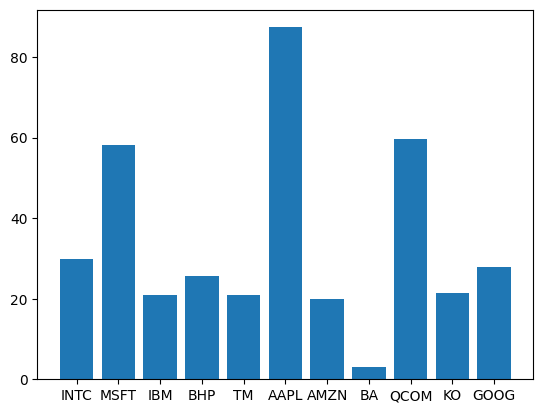

In [148]:
first_value = ticker.iloc[0] 
last_value = ticker.iloc[-1]
percentage_change = ((last_value - first_value) / first_value) * 100
print("Percentage change for year", "2019", ":", percentage_change)

plt.bar(percentage_change.index, percentage_change)

In [129]:
data

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2000-04-01,6930.200000,6930.200000,6662.900000,6662.900000,0.0,0
1,2000-05-01,6665.900000,6665.900000,6500.400000,6535.900000,0.0,0
2,2000-06-01,6535.900000,6547.300000,6424.400000,6447.200000,0.0,0
3,2000-07-01,6477.200000,6532.400000,6438.800000,6504.800000,0.0,0
4,2000-10-01,6504.800000,6634.200000,6504.800000,6607.700000,0.0,0
...,...,...,...,...,...,...,...
5217,2020-12-22,NaN,NaN,NaN,NaN,NaN,0
5218,2020-12-23,6453.200195,6497.299805,6431.200195,6495.799805,807695400.0,0
5219,2020-12-24,6495.799805,6530.299805,6479.600098,6502.100098,477470700.0,0
5220,2020-12-29,6502.100098,6676.600098,6502.100098,6602.700195,824116800.0,0
